In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.colors


In [2]:
df = pd.read_csv("../data/prepared_data_cont.csv", encoding="utf-8", index_col=0)

# World maps

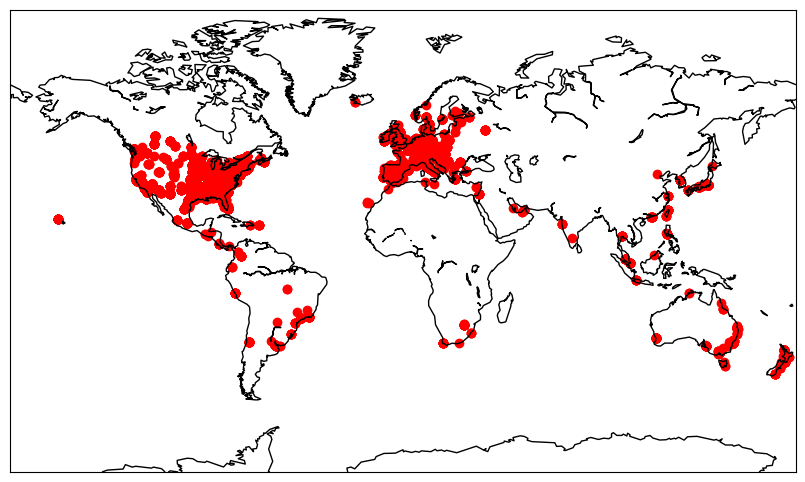

In [8]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)
map.drawcoastlines()

map.scatter(df["Longitude"], df["Latitude"], latlon=True, color='red')
plt.show()

In [9]:
df_cities = df.groupby(["City", "Country"])["Venue"].count().reset_index()
df_cities = df_cities.rename(columns={"Venue" : "Count"})
df_cities = df_cities.merge(df, how="outer", on=["City", "Country"])[["City", "Country", "Count", "Latitude", "Longitude"]].drop_duplicates().reset_index(drop=True)

In [10]:
df_cities

City               Country  Count   Latitude   Longitude
0       Aarhus               Denmark      1  56.149628   10.213405
1     Aberdeen              Scotland      2  57.148243   -2.092809
2    Abu Dhabi  United Arab Emirates      2  24.453835   54.377401
3     Adelaide             Australia     27 -34.928181  138.599931
4     Alajuela            Costa Rica      1  10.452332  -84.466328
..         ...                   ...    ...        ...         ...
613     Zagreb               Croatia      6  45.813097   15.977279
614    Zapopan                Mexico      4  20.721120 -103.391367
615   Zaragoza                 Spain      3  41.652134   -0.880943
616    Zeltweg               Austria      1  47.191204   14.754924
617     Zurich           Switzerland     47  47.374449    8.541042

[618 rows x 5 columns]

In [11]:
import math

In [12]:
df_cities["Count_log"] = df_cities["Count"].apply(lambda x : math.log(x+1))

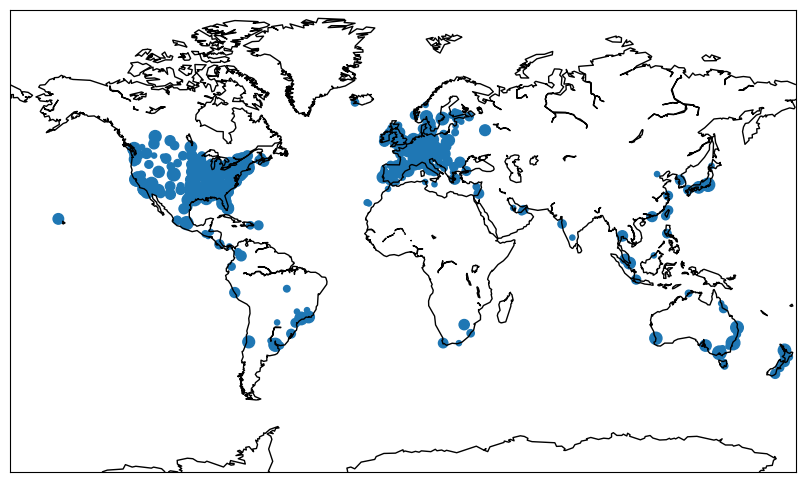

In [13]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], latlon=True, s=df_cities['Count_log']*20)
plt.show()

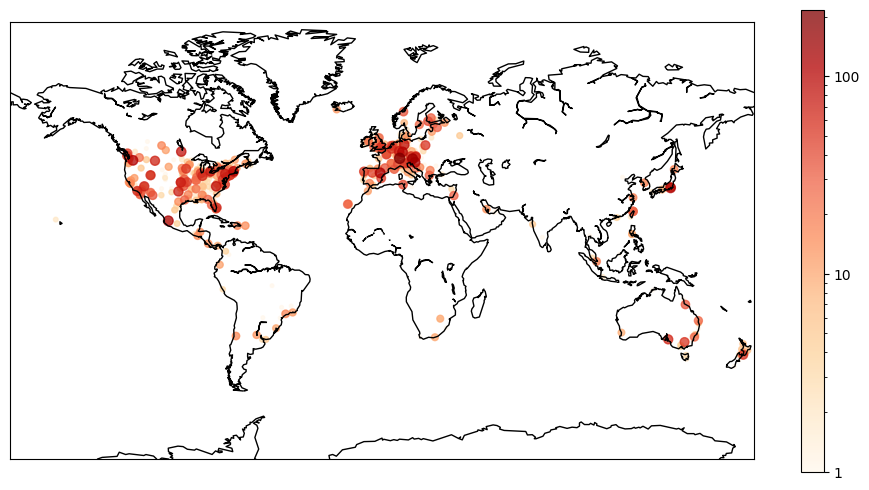

In [53]:
fig = plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)
map.drawcoastlines()

map.scatter(df_cities["Longitude"], 
            df_cities["Latitude"], 
            latlon=True, 
            c=df_cities['Count'].sort_values(), 
            s=df_cities['Count_log'].sort_values() * 10, 
            alpha=0.75, 
            cmap='OrRd', 
            norm=matplotlib.colors.LogNorm()
)

cbar = plt.colorbar()
cbar = cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.show()

In [12]:
fig = px.density_mapbox(df_cities, lat='Latitude', lon='Longitude', z='Count', radius=20,
                        center=dict(lat=0, lon=180), zoom=1,
                        mapbox_style = 'open-street-map')

In [13]:

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show(renderer="notebook")

In [14]:
df["Continent"].value_counts()

Continent
North America    4134
Europe           2387
Oceania           478
Asia              309
South America     259
Africa             31
Name: count, dtype: int64

In [15]:
df_euro = df[df["Continent"] == "Europe"]
df_asia = df[df["Continent"] == "Asia"]
df_africa = df[df["Continent"] == "Africa"]
df_na = df[df["Continent"] == "North America"]
df_sa = df[df["Continent"] == "South America"]
df_oceania = df[df["Continent"] == "Oceania"]

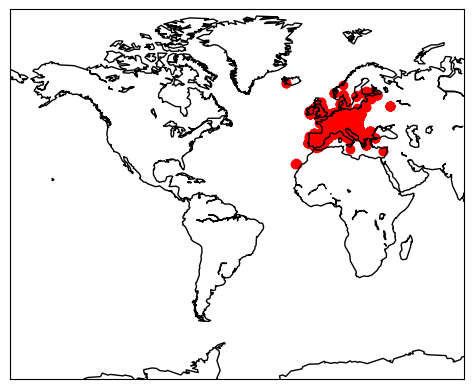

In [16]:
df_euro = df[df["Continent"] == "Europe"]
map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=80,
              lat_0=0, lon_0=0)
map.drawcoastlines()

map.scatter(df_euro["Longitude"], df_euro["Latitude"], latlon=True, color='red')
plt.show()

In [24]:
df_euro.shape

(311, 9)

In [18]:
df_euro.sort_values("Latitude").head(10)

Country                    City                              Venue  \
7347   Spain              Las Palmas               Estadio Gran Canaria   
2402   Spain                Tenerife  Estadio Heliodoro Rodríguez López   
7517   Spain  Santa Cruz de Tenerife     Port of Santa Cruz de Tenerife   
2413  Cyprus                 Larnaca                     Larnaca Marina   
2414  Cyprus                 Larnaca                     Larnaca Marina   
2401   Malta                  Attard             Ta' Qali National Park   
3334   Spain                Marbella      Estadio Municipal de Marbella   
3920   Spain                  Malaga                Estadio La Rosaleda   
4044   Spain                  Malaga      Estadio Municipal de Marbella   
4548   Spain                  Malaga                   Puerto de Málaga   

                    Date                                   Artist  \
7347        May 15, 2012  Bruce Springsteen and the E Street Band   
2402             29 June                               Ed Sheeran   
7517  September 26, 1993                          Michael Jackson   
2413         7 September                               Ed Sheeran   
2414         8 September                               Ed Sheeran   
2401             26 June                               Ed Sheeran   
3334      August 5, 1988                          Michael Jackson   
3920         10 May 1987                                  Genesis   
4044       July 18, 1987                              Tina Turner   
4548        16 July 1998                       The Rolling Stones   

                       Tour title   Latitude  Longitude Continent  
7347     Wrecking Ball World Tour  27.958000 -15.606231    Europe  
2402                 +–=÷× Tour †  28.293578 -16.621447    Europe  
7517         Dangerous World Tour  28.467178 -16.250784    Europe  
2413                 +–=÷× Tour †  34.923609  33.623618    Europe  
2414                 +–=÷× Tour †  34.923609  33.623618    Europe  
2401                 +–=÷× Tour †  35.890917  14.443009    Europe  
3334                          Bad  36.508976  -4.885620    Europe  
3920         Invisible Touch Tour  36.721303  -4.421637    Europe  
4044  Break Every Rule World Tour  36.721303  -4.421637    Europe  
4548      Bridges to Babylon Tour  36.721303  -4.421637    Europe

In [6]:
df_cities = pd.DataFrame(df["City"].value_counts())
df_cities = df_cities.join(df.set_index('City')[["Latitude", "Longitude"]], how="left").drop_duplicates()

In [7]:
df_cities

count   Latitude   Longitude
City                                   
Aarhus         1  56.149628   10.213405
Aberdeen       2  57.148243   -2.092809
Abu Dhabi      2  24.453835   54.377401
Adelaide      27 -34.928181  138.599931
Alajuela       1  10.452332  -84.466328
...          ...        ...         ...
Zaragoza       3  41.652134   -0.880943
Zeltweg        1  47.191204   14.754924
Zurich         6  47.374449    8.541042
Zürich        41  47.374449    8.541042
Łódź           4  51.772824   19.478486

[646 rows x 3 columns]

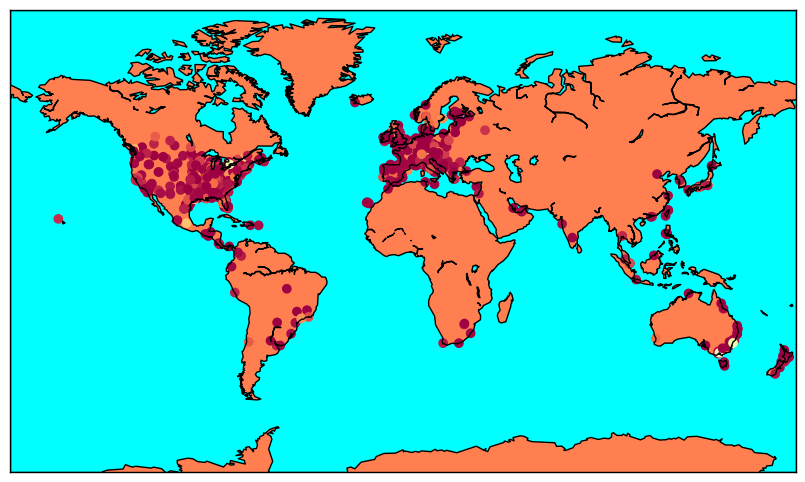

In [20]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            c = df_cities["Count"], cmap = "Spectral",
            latlon=True, )
plt.show()

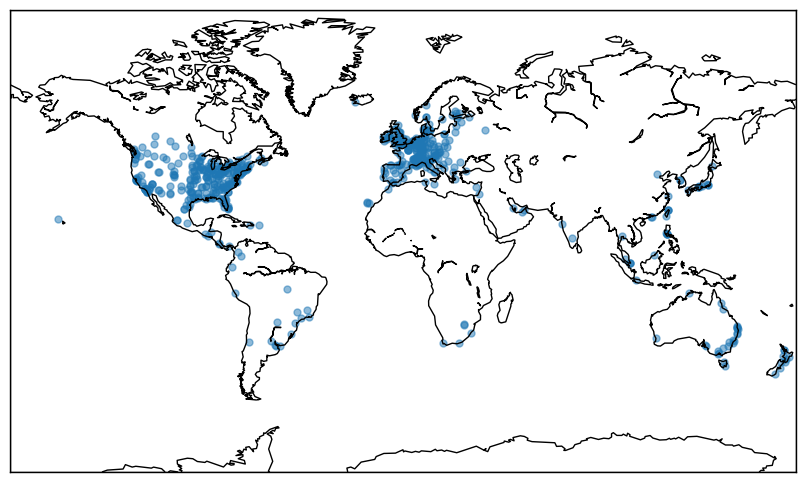

In [21]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary()
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            alpha = 0.5, s = 25,
            latlon=True, )
plt.show()

In [23]:
def normalize(x, min_val, max_val):
    return (x-min_val)/(max_val-min_val)
df_cities = df_cities.sort_values("Count")
df_cities["Alpha"] = df_cities["Count"] / sum(df_cities["Count"])
df_cities["Alpha"] = df_cities["Alpha"].apply(normalize, 
                                              args=(df_cities["Alpha"].min(), df_cities["Alpha"].max()))

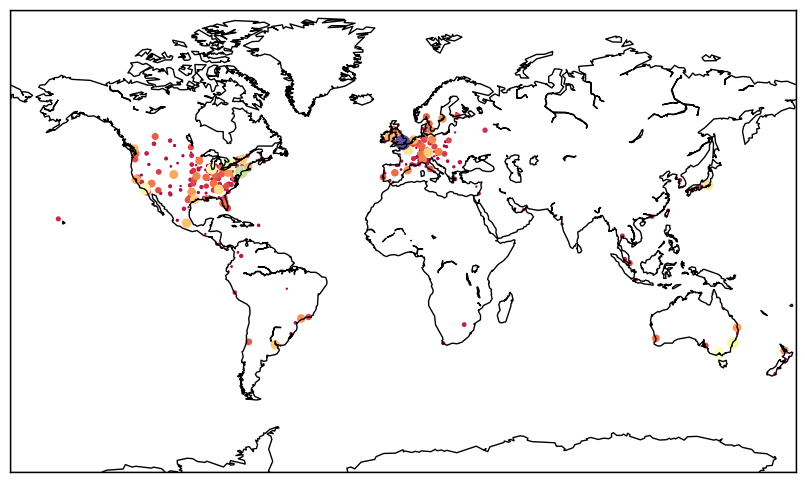

In [25]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary()
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            c = df_cities["Count"], cmap = "Spectral", 
            s=df_cities["Alpha"]*100, latlon=True, )

# Statistics

<Axes: ylabel='count'>

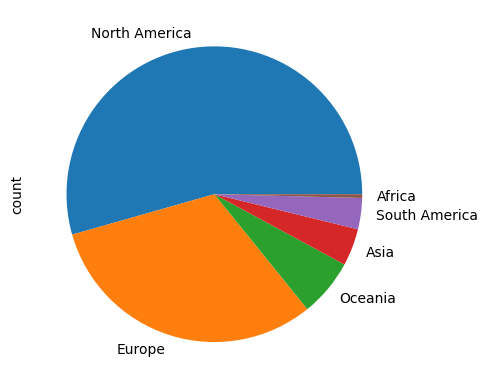

In [26]:
df["Continent"].value_counts().plot(kind="pie")

In [27]:
df.groupby("Tour title")["Continent"].nunique().value_counts()

Continent
5    16
4    15
3     8
2     7
6     5
1     2
Name: count, dtype: int64

In [28]:
df.groupby("Tour title")["Continent"].nunique().sort_values()

Tour title
The Garth Brooks World Tour (2014–2017)    1
The Rolling Stones American Tour 1981      1
The Joshua Tree Tour                       2
World's Hottest Tour                       2
Victory Tour                               2
The Division Bell Tour                     2
Renaissance World Tour                     2
No Filter Tour                             2
Magic Tour                                 2
Living Proof: The Farewell Tour            3
Glass Spider Tour                          3
Farewell Yellow Brick Road                 3
Let's Talk About Love World Tour           3
The Garth Brooks World Tour                3
Steel Wheels Tour                          3
Summer Carnival †                          3
Where We Are Tour                          3
Sticky & Sweet Tour                        4
Zoo TV Tour                                4
+–=÷× Tour †                               4
The Wall                                   4
The Wall Live                              4

Top values, artist by continents numbers by continents

In [29]:
df["Country"].value_counts().head(10)

Country
United States    3587
Canada            428
Germany           421
Australia         398
England           395
France            220
Japan             156
Italy             149
Netherlands       147
Spain             138
Name: count, dtype: int64

In [30]:
df["City"].value_counts().head(10)

City
London             219
New York City      144
Toronto            121
Sydney             120
Los Angeles        117
Philadelphia       117
East Rutherford    112
Melbourne          108
Chicago            103
Paris               90
Name: count, dtype: int64